In [1]:
import numpy as np

import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
from torch.nn import Linear 

# from torchviz import make_dot
from torchsummary import summary


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
 

%matplotlib inline

In [2]:
def tensor_from_numpy(x, device):
    return torch.from_numpy(x).to(device)

def plot_loss_with_acc(loss_history, val_acc_history):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(range(len(loss_history)), loss_history,
             c=np.array([255, 71, 90]) / 255.)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training Loss ')
    plt.show() 
    


labelList=pd.read_csv('../data/label.csv',header=None)[1]
for i in range(0,len(labelList)):
    labelList[i]+=1
    
    
idx0 = np.where(np.array(labelList)==0)
idx1 = np.where(np.array(labelList)==1)
idx2 = np.where(np.array(labelList)==2)
idx3 = np.where(np.array(labelList)==3)
idx4 = np.where(np.array(labelList)==4)
idx5 = np.where(np.array(labelList)==5)
idx6 = np.where(np.array(labelList)==6)
idx7 = np.where(np.array(labelList)==7)
idx8 = np.where(np.array(labelList)==8)
idx9 = np.where(np.array(labelList)==9)
idx10 = np.where(np.array(labelList)==10)
idx11 = np.where(np.array(labelList)==11) 

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
node_feature = np.load('../data/X_np/X.npy')
node_feature2= np.zeros(shape=[850,1879],dtype=np.float32)
node_feature2[:,0:256]=node_feature[:, 0:256]

for i in range(0,850):
    for j in range(0,1623):
        try:
            node_feature2[i][j+256]=max(node_feature[i,256+5*j: 256+j*5+5]) 
        except:
            print(j)
            break
            


node_feature2/=node_feature2.sum(1, keepdims=True)   
node_feature2.shape

(850, 1879)

In [4]:
node_feature4= np.zeros(shape=[850,258],dtype=np.float32)
node_feature4[:,0:256]=node_feature[:, 0:256]


for i in range(0,850):
    node_feature4[i][256]=np.argmax(node_feature[i][256:])
    node_feature4[i][257]=np.max(node_feature[i][256:])

 
node_feature4/=node_feature4.sum(1, keepdims=True)    

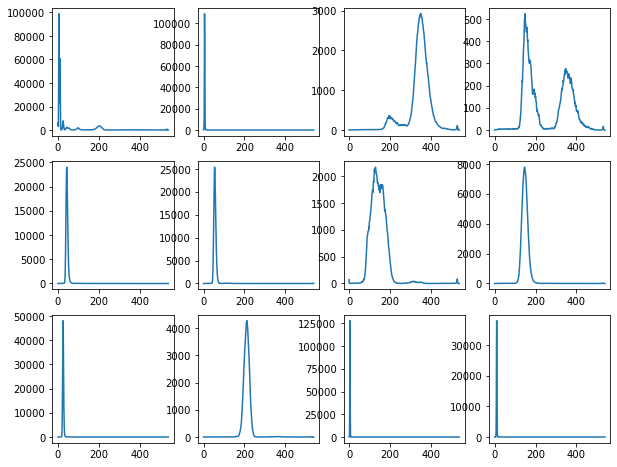

5
5
352
148
43
55
129
146
25
213
4
10


In [5]:
# 查看 coverage 的分布  

node_feature3= np.zeros(shape=[850,797],dtype=np.float32)
node_feature3[:,0:256]=node_feature[:, 0:256]

for i in range(0,850):
    for j in range(0,541):
        try:
            node_feature3[i][j+256]=np.mean(node_feature[i,256+15*j: 256+j*15+15]) 
        except:
            print(j)
            break    

# node_feature3/=node_feature3.sum(1, keepdims=True)   
node_feature3.shape

plot_x=[i  for i in range(0,node_feature3.shape[1]-256)]

plot_y0=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y1=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y2=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y3=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y4=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y5=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y6=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y7=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y8=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y9=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y10=[0 for i in range(0,node_feature3.shape[1]-256)]
plot_y11=[0 for i in range(0,node_feature3.shape[1]-256)]

for i in  idx0[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y0[j]+=node_feature3[i][j+256]
            
for i in  idx1[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y1[j]+=node_feature3[i][j+256]

for i in  idx2[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y2[j]+=node_feature3[i][j+256]
        
for i in  idx3[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y3[j]+=node_feature3[i][j+256]
            
for i in  idx4[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y4[j]+=node_feature3[i][j+256]

for i in  idx5[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y5[j]+=node_feature3[i][j+256]

for i in  idx6[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y6[j]+=node_feature3[i][j+256]
            
for i in  idx7[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y7[j]+=node_feature3[i][j+256]

for i in  idx8[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y8[j]+=node_feature3[i][j+256]
        
for i in  idx9[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y9[j]+=node_feature3[i][j+256]
            
for i in  idx10[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y10[j]+=node_feature3[i][j+256]

for i in  idx11[0] :
    for j in range(0,node_feature3.shape[1]-256):
        plot_y11[j]+=node_feature3[i][j+256]
            
fig,ax=plt.subplots(3,4,figsize=[10,8])
    
ax[0][0].plot(plot_x,plot_y0 )
ax[0][1].plot(plot_x,plot_y1 )    
ax[0][2].plot(plot_x,plot_y2 )
ax[0][3].plot(plot_x,plot_y3 )    
ax[1][0].plot(plot_x,plot_y4 )
ax[1][1].plot(plot_x,plot_y5 )    
ax[1][2].plot(plot_x,plot_y6 )
ax[1][3].plot(plot_x,plot_y7 )      
ax[2][0].plot(plot_x,plot_y8 )
ax[2][1].plot(plot_x,plot_y9 )    
ax[2][2].plot(plot_x,plot_y10 )
ax[2][3].plot(plot_x,plot_y11 )  

plt.show() 

print(plot_y0.index(max(plot_y0)))
print(plot_y1.index(max(plot_y1)))
print(plot_y2.index(max(plot_y2)))
print(plot_y3.index(max(plot_y3)))
print(plot_y4.index(max(plot_y4)))
print(plot_y5.index(max(plot_y5)))
print(plot_y6.index(max(plot_y6)))
print(plot_y7.index(max(plot_y7)))
print(plot_y8.index(max(plot_y8)))
print(plot_y9.index(max(plot_y9)))
print(plot_y10.index(max(plot_y10)))
print(plot_y11.index(max(plot_y11)))
 

In [15]:
#tensor_x = tensor_from_numpy(node_feature2, DEVICE)

tensor_x = tensor_from_numpy(node_feature2, DEVICE)

train_mask=[True for i in range(0,850)]
tensor_train_mask = tensor_from_numpy(np.array(train_mask), DEVICE )

In [16]:
class AutoEncoder(nn.Module):

    def __init__(self, input_dim):
        super(AutoEncoder,self).__init__()
 
        self.linear1=nn.Linear(input_dim,400)
        self.linear2=nn.Linear(400,150)
        self.linear3=nn.Linear(150,36)
        self.linear4=nn.Linear(36,150)
        self.linear5=nn.Linear(150,400)
        self.linear6=nn.Linear(400,input_dim)
        
#         self.bn1=nn.BatchNorm1d(num_features=400)
#         self.bn2=nn.BatchNorm1d(num_features=150)
#         self.bn3=nn.BatchNorm1d(num_features=36)
#         self.bn4=nn.BatchNorm1d(num_features=150)
#         self.bn5=nn.BatchNorm1d(num_features=400)
    
    def forward(self, feature):
        self.h1 = F.relu(self.linear1( feature))
        self.h1 = F.normalize(self.h1)
#         self.h1 = self.bn1(self.h1)
        
        self.h2  = F.sigmoid(self.linear2(self.h1))
        self.h2 = F.normalize(self.h2)
#         self.h2 = self.bn2(self.h2)

        self.h3 = F.relu(self.linear3( self.h2))
        self.h3 = F.normalize(self.h3)
#         self.h3 = self.bn3(self.h3)

        self.h4  = F.sigmoid(self.linear4( self.h3))
        self.h4 = F.normalize(self.h4)
#         self.h4 = self.bn4(self.h4)

        self.h5  = F.relu(self.linear5( self.h4))
        self.h5 = F.normalize(self.h5)
#         self.h5 = self.bn5(self.h5)
        
        self.h6  = self.linear6( self.h5)
 
        return  self.h6


In [17]:
# 超参数定义
LEARNING_RATE = 0.001
WEIGHT_DACAY = 1e-4
EPOCHS = 7
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [18]:
# 训练主体函数
def train():
    loss_history = []
    val_acc_history = []
    model.train()
 
    for epoch in range(EPOCHS):
         
        logits = model(tensor_x)  # 前向传播
        train_mask_logits = logits[tensor_train_mask]   # 只选择训练节点进行监督
 
    
        
        loss = criterion(train_mask_logits, tensor_x)
        optimizer.zero_grad()
        loss.backward()     # 反向传播计算参数的梯度
        optimizer.step()    # 使用优化方法进行梯度更新
 
        loss_history.append(loss.item())
 
    return loss_history, model.h3, model.h4

In [19]:
# 模型定义：Model, Loss, Optimizer
model = AutoEncoder(tensor_x.shape[1]).to(DEVICE)
criterion=nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), 
                       lr=LEARNING_RATE, 
                       weight_decay=WEIGHT_DACAY)

C:\Users\Chester_Zhang\anaconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[0.001735098659992218, 0.0010998072102665901, 0.0006681032245978713, 0.0003881642478518188, 0.00021388141612987965, 0.00011107099271612242, 5.5433403758797795e-05]


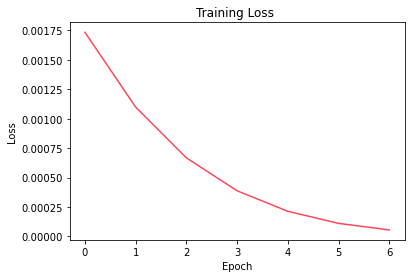

In [20]:
loss,feature_layer, rec_X = train()
 
print(loss)
plot_loss_with_acc(loss, [])

In [22]:
feature_np=feature_layer.detach().numpy()
# feature_np=np.load("../data/my_auto_encoder/feacture_np.npy")

kmeans = KMeans(n_clusters=12,init='k-means++').fit(feature_np)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

print('purity : ',purity_score(labelList,kmeans.labels_ ))
print('ARI : ',adjusted_rand_score(labelList,kmeans.labels_))
print('NMI : ',normalized_mutual_info_score(labelList,kmeans.labels_ ))
print('homogeneity : ',homogeneity_score(labelList,kmeans.labels_))
print('completeness : ',completeness_score(labelList,kmeans.labels_ ))

purity :  0.7647058823529411
ARI :  0.6261001583089132
NMI :  0.7114940734274736
homogeneity :  0.6879717965404597
completeness :  0.7366817816033471


In [ ]:
# torch.save(model, '../model/my_auto_encoder.pt')

In [29]:
summary(model, (850,1879))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 850, 400]            752,000
├─Linear: 1-2                            [-1, 850, 150]            60,150
├─Linear: 1-3                            [-1, 850, 36]             5,436
├─Linear: 1-4                            [-1, 850, 150]            5,550
├─Linear: 1-5                            [-1, 850, 400]            60,400
├─Linear: 1-6                            [-1, 850, 1879]           753,479
Total params: 1,637,015
Trainable params: 1,637,015
Non-trainable params: 0
Total mult-adds (M): 1.63
Input size (MB): 6.09
Forward/backward pass size (MB): 19.55
Params size (MB): 6.24
Estimated Total Size (MB): 31.89


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 850, 400]            752,000
├─Linear: 1-2                            [-1, 850, 150]            60,150
├─Linear: 1-3                            [-1, 850, 36]             5,436
├─Linear: 1-4                            [-1, 850, 150]            5,550
├─Linear: 1-5                            [-1, 850, 400]            60,400
├─Linear: 1-6                            [-1, 850, 1879]           753,479
Total params: 1,637,015
Trainable params: 1,637,015
Non-trainable params: 0
Total mult-adds (M): 1.63
Input size (MB): 6.09
Forward/backward pass size (MB): 19.55
Params size (MB): 6.24
Estimated Total Size (MB): 31.89

In [ ]:
# from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/fashion_mnist_experiment_1')
torch.__version__

In [ ]:
# np.save("../data/my_auto_encoder/feacture_np.npy",feature_np )
# np.save("../data/my_auto_encoder/rec_X.npy", rec_X.detach().numpy() )

In [ ]:
# class HalfAutoEncoder(nn.Module):
#     def __init__(self,linear4,linear5,linear6 ):
#         super(HalfAutoEncoder,self).__init__()
         
#         self.linear4= linear4
#         self.linear5= linear5
#         self.linear6= linear6
 
    
#     def forward(self, h3):
#         self.h4  = F.relu(self.linear4( h3))
#         self.h4 = F.normalize(self.h4)
        
#         self.h5  = F.sigmoid(self.linear5( self.h4))
#         self.h5 = F.normalize(self.h5)
        
#         self.h6  =  self.linear6(self.h5) 
  

#         return  self.h6

In [ ]:
# half_auto_encoder=HalfAutoEncoder(model.linear4, model.linear5, model.linear6 ).to(DEVICE)

In [ ]:
# torch.save(half_auto_encoder, '../model/half_auto_encoder.pt')